<a href="https://colab.research.google.com/github/NetaTartakovsky/SimpleLinearRegression/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression Project

**Project Overview**

For this project, I created a linear regression model from scratch, while refraining from using any third party libraries which already contain these functions, such as sklearn. I then used the model to explore the linear relationship between property features and sales values for houses sold in King County, WA between May 2014 and May 2015.

**Linear Regression**

Linear regression is a statistical approach to modeling the linear relationship between a dependent variable and one or more independent, or explanatory, variables.

A simple linear regression line (with only one independent variable) takes the form of:

$$Y = mX + b$$

Where Y represents the dependent variable, X represents the independent variable, m is the slope, and b is the intercept. Predictions for Y can be made using this equation with a given X value.

**Multiple Linear Regression**

Multiple linear regression is the process for modeling the linear relationship between multiple explanatory variables and one dependent variable. These explanatory variables are also known as the 'feature variables', and the dependent variable is known as the 'target variable'. This is the type of relationship that I explored in this project. In this approach, the linear regression line takes the form of:

$$Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ ... \ + \beta_n x_n$$

Where Y represents the target variable, each x represents the n different feature variables, 𝛽0 is the intercept, and the remaining 𝛽 values represent the coefficients, or parameters, for each explanatory variable.

When this statistical model is implemented, the x values (features) are represented as a vector of values, called X. The parameters are also represented as a vector, called 𝛽. The model of the relationship can now be represented as:

$$Y = X^{T}\beta$$

Where T denotes the transpose of the vector X, so the equation above represents the inner product of the vector of feature variables with the vector of parameters of the model, allowing for the calculation of the predicted value of Y.

**Cost Function**

The goal for the linear regression model is to minimize the difference, or error, between the predicted value and the actual value. This error can be calculated using a cost function. The cost function I chose to use for my implementation was the *(1/2) x Mean Squared Error (MSE)* function:

$$ E = \frac{1}{2n} \ \sum_{i = 1}^n \ (\hat{y}_i - y_i)^2$$

Where (𝑦𝑖 − 𝑦̂𝑖) is the difference between the actual y value and the predicted y value.

You can then plug in 𝑦̂𝑖 = 𝑚*𝑥𝑖+𝑏 to get the following equation for error:

$$ E = \frac{1}{2n} \ \sum_{i = 1}^n \ ((mx_i + b) - y_i)^2$$

**Gradient Descent**

Gradient descent is an iterative optimization algorithm intended for finding the minimum of a function. This is the algorithm I employed in my linear regression model to optimize the values of the parameters such that the cost function is minimized. The general idea is to take gradual steps in the opposite direction of the slope of the cost function in order to find a local minimum. This can be accomplished by taking the derivative of the cost function with respect to each parameter, and updating the parameters with the new direction they need to move towards. This derivative can be represented as:

$$D = \frac{1}{n} \ \sum_{i=1}^n \ x_i \ ((mx_i + b) - y_i)$$

In the implementation of the model, with vector representation, this derivative takes the form of:

$$D = \frac{1}{n} \ X^T \ (X \cdot \beta - Y)$$

This is the equation that is used to train the model and iteratively change the parameters to minimize the error between the predictions and the actual values. During each iteration, the derivative is computed, multiplied by the pre-established learning rate for the model, and then used to update the values of the parameters.

# Implementation of Linear Regression Model

The following code is the implementation of the necessary functions for the construction of the linear regression model. These functions will later be used to model the relationship between property features and sales values in a real estate dataset. 

**Import Python Libraries**

* Pandas: provides tools for data manipulation and analysis
* Numpy: provides tools for vector computations
* Matplotlib: provides tools to graphically display our data

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Standardizing the Data**

First, I implemented a function that standardizes the feature data. Data standardization allows the gradient descent algorithm to converge much faster. Standardization will convert all the feature variables into variables with a mean of 0 and unit-variance. This is achieved by subtracting the feature's mean from the original feature, and then dividing by the feature's standard deviation.

$$ x' = \frac{x - \bar{x}}{\sigma}$$

Where x is the original feature vector, x̄ is the mean of the feature vector, and 𝜎 is the standard deviation of the feature vector.

This process is implemented with the following fit_and_transform() method. Fit_and_transform() is a from-scratch version of the fit_transform() method from scikit-learn, Python's machine learning library.

The fit_and_transform() method takes a dataset (an array of feature arrays) and standardizes all the elements contained within.

In [173]:
# Standardizes data - for each element in data, subtracts the mean of the column and divides by the standard deviation of the column
# Returns the standardized data in numpy array format
def fit_and_transform(data):
    data = np.array(data)
    mean = []
    stdev = []
    for i in range(len(data[0])):
        features = data[:,i]
        mean.append(np.mean(features))
        stdev.append(np.std(features))
    transformed_data = []
    for i in range(len(data)):
        transformed_data.append(list((data[i] - mean) / stdev))
    return np.array(transformed_data)

**Cost Function**

Next, I implemented the method for computing the cost with a given set of feature data, target values, and parameters.

In [174]:
# Computes cost using (1/2) * Mean Squared Error (MSE) calculation
def cost_function(X, y, params):
    n = len(y)
    cost = np.sum((X @ params - y) ** 2 / (2*n))
    return cost

**Gradient Descent**

Then, I implemented the iterative gradient descent method. This method trains the linear regression model by gradually optimizing the parameters using a given set of feature data and corresponding target values. It also takes in a value indicating the number of iterations it should perform, and a learning rate, which will be used to compute the new parameter values. During each iteration, the parameter values will be updated and the current cost will be computed and appended to an array holding the history of costs for all the iterations. Once all the iterations are complete, the final paramters and cost history array will be returned.

In [175]:
# Iterates given number of times, and improves the fit of the parameters each time
# The cost for each iteration is stored in cost_history array
# Returns the final parameters and the cost history
def gradient_descent(X, y, params, num_iters, learning_rate):
    n = len(y)
    cost_history = []

    for i in range(num_iters):
        change = (X.T @ ((X @ params) - y)) / n  # the change is computed using the derivative of the cost function
        params = params - learning_rate * change
        cost = cost_function(X, y, params)
        cost_history.append(cost)

    return params, cost_history

**Predicting Values**

Lastly, I implemented a method to predict target values for a given set of feature values and parameters. This method simply returns the inner product of the two given vectors.

In [176]:
# Predicts target values using given feature values and parameters
def predict(X, params):
    return (X @ params)

# Linear Regression of Real Estate Data

Now that all the necessary linear regression functions have been implemented, a real dataset can be used to train the model.

**The Data**

The dataset I used contains home sales prices and features for King County (which includes Seattle) during May 2014 - May 2015.

It can be downloaded here:
https://geodacenter.github.io/data-and-lab//KingCounty-HouseSales2015/

I uploaded the data using the Pandas read_csv() method.

In [177]:
url = 'https://raw.githubusercontent.com/NetaTartakovsky/SimpleLinearRegression/main/kc_house_data.csv?token=AJZYVEYMP5DPJS5ATH7DEUS74KIPS'
df1 = pd.read_csv(url)

**Data Exploration**

Before constructing the model, I performed data exploration in order to thoroughly understand the dataset. 


First, I displayed a preview of the first 5 rows of the dataset using the Pandas head() method.

In [178]:
df = df1
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Next, I used the Pandas dataframe shape attribute to get the dimensions of the dataset.

In [179]:
(entries, cols) = df.shape
print('Columns: %i' % cols)
print('Entries: %i' % entries)

Columns: 21
Entries: 21613


Then, to get more information about the contents of each column, I called the Pandas info() method.

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Finally, to make sure all the data was valid, I checked if any of the columns contained any null values.

In [181]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Data Preparation**

Since the 'ID', 'Date', 'Year Renovated', and 'Zip Code' columns will not be necessary for the linear regression, I removed them from the dataset.
* 'Year Renovated' will not be helpful because if the home was not renovated at all, there is a zero entered, which will skew the data.

In [182]:
df.drop(columns=['id','date', 'yr_renovated', 'zipcode'], inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045,1800,7503


Next, I loaded the data into my X and y variables.
* The first column ('Price') is the target variable, so I stored it in the y variable
* The remaining columns are the feature variables, so I stored them in the X variable

In [183]:
# Load the feature columns into X, and the target column into y
X = df.iloc[:, 1:]
y = df.iloc[:, 0]

To prepare the feature data for linear regression, I called the fit_and_transform() method that I defined earlier to standardize the data.

I also appended a column of ones at the beginning of the feature data, to act as the bias term for calculating the intercept of the regression line.

In [184]:
# Get the number of samples
n = len(y)

# Standardize the feature data to make gradient descent more accurate
X = fit_and_transform(X)

# Append a column of ones to the feature data, to add a bias term for calculating the intercept
X = np.hstack([np.ones((n, 1)), X])

Then, I split the data into training and testing sets. The training sets will be used to train the model, and the testing sets will be used to evaluate the model's performance.


In [185]:
# Use 70% of the data to train the model, and 30% to test
train_size = int(n * .7)
test_size = n - train_size

print('Number of training samples: %i' % train_size)
print('Number of testing samples: %i' % test_size)

# Divide the data into training and testing sets
X_train = X[:train_size, :]
X_test = X[train_size:, :]
y_train = y[:train_size]
y_test = y[train_size:]

Number of training samples: 15129
Number of testing samples: 6484


**Training the Model**

After fully preparing the data, I began training the model using the training sets and the previously defined linear regression methods.

First, I initialized the parameters to a vector of zeros.
I also initialized the learning rate to 0.003 and the number of iterations to 3000.

Using these values, I called my gradient_descent() method and stored its output.

In [186]:
# Initialize the parameters to 0
params = np.zeros(X_train.shape[1])

# Initialize the desired learning rate and the number of iterations for the gradient descent function
learning_rate = 0.003
num_iter = 3000

# Perform gradient descent with the training sets, and store the final parameters and cost history
new_params, cost_history = gradient_descent(X_train, y_train, params, num_iter, learning_rate)

To quickly check my model's behavior, I plotted the cost history. The figure shows that cost significantly decreased during the first 500 iterations, and kept decreasing at a much slower rate for the remaining 2500 iterations, as expected.

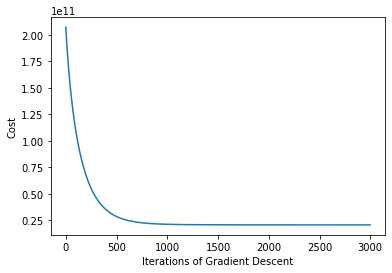

In [187]:
plt.plot(cost_history)
plt.xlabel('Iterations of Gradient Descent')
plt.ylabel('Cost')
plt.show()

**Making Predictions**

Using my previously defined predict() method, I made predictions of housing prices from the given test data and new parameters.

In [188]:
# Use the final parameters to predict target values for given test feature data
y_predict = predict(X_test, new_params)
print(y_predict)

[807999.03937182 903415.98953292  30796.60279483 ... 129188.97145135
 343110.07600478 132130.14459656]


# Evaluating the Model

**Metrics for Evaluating Linear Regression Models**

1. *Mean Squared Error (MSE)*:
    
   The MSE of an estimator measures the average squared error between the actual values and the predicted values. It can be computed using the following equation:

   $$MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2$$

   A value of 0 would suggest a perfect fit, indicating that there is 0 error between the actual values and estimated values.

2. *Root Mean Squared Error (RMSE)*:

   The RMSE of an estimator calculates the square root of the average squared error between the actual values and the predicted values. This metric measures the spread of the data points from the regression line. Lower values indicate a smaller spread, meaning that the predictions made by the regression line are closer to the actual values. The equation used to compute this is as follows:

   $$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}$$

3. *R-Squared*:

  The R-Squared value, also known as the coefficient of determination, represents the proportion of variance in the dependent variable that can be explained by the independent variable. It takes on a value between 0 and 1.

  The following equation is used to compute this score:

  $$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

  Where 𝑆𝑆𝑟𝑒𝑠 is the sum of the squares of the residuals and is calculated as follows:

  $$SS_{res} = \sum_{i=1}^n(y_i - \hat{y}_i)^2$$

  And 𝑆𝑆𝑡𝑜𝑡 is the total sum of squares and is calculated as follows:

  $$SS_{tot} = \sum_{i=1}^n(y_i - \bar{y})^2$$ 

  An R-Squared value between 0.3 and 0.5 would indicate a weak score.
  
  A value between 0.5 and 0.7 would indicate a moderate score.
  
  And a value greater than 0.7 would indicate a strong score, and suggest that this is a good model for making predictions for this data.


I implemented evaluation metric methods as follows.

In [189]:
# Computes Mean Squared Error (MSE)
def MSE(y_actual, y_predict):
    errors = (y_actual - y_predict) ** 2
    sum_errors = np.sum(errors)
    n = float(len(errors))
    mse = sum_errors / n
    return mse

# Computes Root Mean Squared Error (RMSE)
def RMSE(y_actual, y_predict):
    errors = (y_actual - y_predict) ** 2
    sum_errors = np.sum(errors)
    n = float(len(errors))
    rmse = np.sqrt(sum_errors / n)
    return rmse

# Computes R2 score
def R2(y_actual, y_predict):
    residual_errs = (y_actual - y_predict) ** 2
    sum_residuals = np.sum(residual_errs)
    
    y_mean = np.mean(y_actual)
    errors = (y_actual - y_mean) ** 2
    sum_squares = np.sum(errors)

    r2 = 1 - (sum_residuals / sum_squares)
    return r2

I then used these evaluation metric methods to evaluate the performance of the linear regression model that I trained on the real estate data.

In [190]:
# Compute all evaluation metrics for the model
mse = MSE(y_test, y_predict)
rmse = RMSE(y_test, y_predict)
r2 = R2(y_test, y_predict)

print('Mean Squared Error (MSE): %.3f' % mse)
print('Root Mean Squared Error (RMSE): %.3f' % rmse)
print('R-Squared: %.3f' % r2)

Mean Squared Error (MSE): 42202739695.183
Root Mean Squared Error (RMSE): 205433.054
R-Squared: 0.689


The MSE value indicates that, on average, the predicted values were off by 45,035,248,716.58. 

The RMSE value of 212,215.10 represents a standard deviation of 212,215.10 for the predicted values.

The R-Squared score was 0.689, indicating that this model is a moderate fit for the data. This score isn't high enough for this model to be considered strong, and while it does suggest that there is a moderate linear relationship between the property features and the property prices in this dataset, perhaps a different approach would result in a better fit. 

I created a graph to see the spread of the actual values from the predicted regression line, and get a visual representation of the relationship.

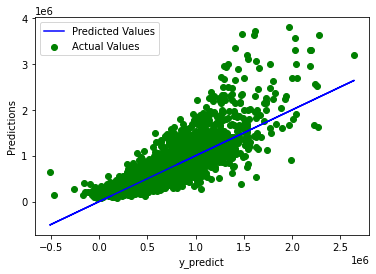

In [191]:
plt.scatter(y_predict, y_test, color='green', label='Actual Values')
plt.plot(y_predict, y_predict, color='blue', label='Predicted Values')
plt.legend()
plt.xlabel('y_predict')
plt.ylabel('Predictions')
plt.show()

We can see from the graph that although the model appears to do a good job predicting property values approximately lower than $2 million, its accuracy seems to decrease as property values rise higher than this threshold. This indicates that a linear relationship may not be the best approach for modeling this data.